In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from tp06.src.kmeans_utils import plot_clustering

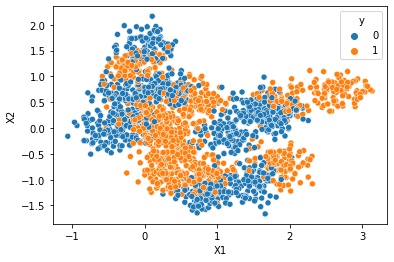

In [2]:
Xy = pd.read_csv("tp07/data/Synth1-2000.csv") 
X = Xy.iloc[:, :-1] 
y = Xy.iloc[:, -1]
plot_clustering(X, y) 
plt.show()

In [3]:
cls = KNeighborsClassifier(n_neighbors=5) 
cls.fit(X, y) 
Y = np.array([[0, 0], [0, -1], [1, 0], [1, 1]]) 
labels = cls.predict(Y) 
labels

array([0, 1, 0, 1])

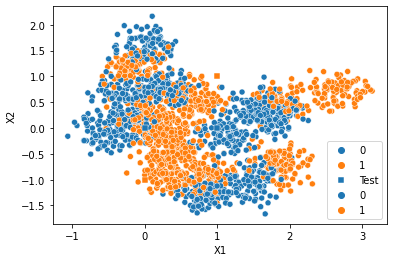

In [4]:
ax, pca = plot_clustering(X, y, label="Train") 
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels, marker="s", ax=ax, label="Test") 
plt.show()

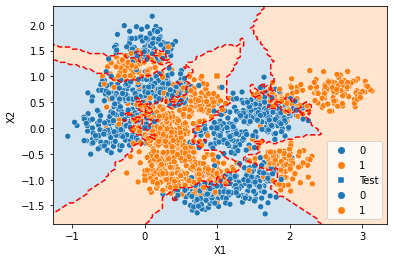

In [5]:
from tp07.src.utils_knn import add_decision_boundary
ax, pca = plot_clustering(X, y, label="Train") 
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels, marker="s", ax=ax, label="Test") 
add_decision_boundary(cls) 
plt.show()

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.66)

[None]

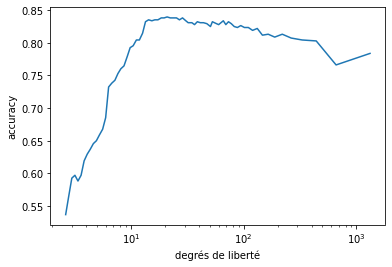

In [7]:
from tp07.src.knn_validation import knn_simple_validation
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int)) 

gen = knn_simple_validation(X_train, y_train, X_val, y_val, n_neighbors_list) 
df = pd.DataFrame(gen,columns=["# neighbors", "accuracy", "degrés de liberté"]) 
sp = sns.lineplot(x="degrés de liberté", y="accuracy", data=df) 
sp.set(xscale="log")

In [8]:
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax() 
Kopt

63

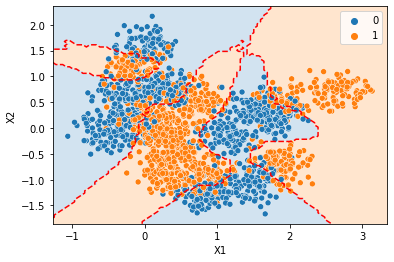

In [9]:
cls = KNeighborsClassifier(n_neighbors=Kopt) 
cls.fit(X, y) 
plot_clustering(X, y) 
add_decision_boundary(cls) 
plt.show()

In [10]:
from tp07.src.knn_validation import knn_multiple_validation
train_size = 0.90 
n_splits = 10 
gen = knn_multiple_validation(X, y, n_splits, train_size, n_neighbors_list) 
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"]) 
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax() 
Kopt

22

[None]

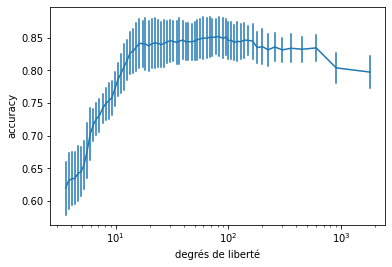

In [11]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df) 
sp.set(xscale="log")

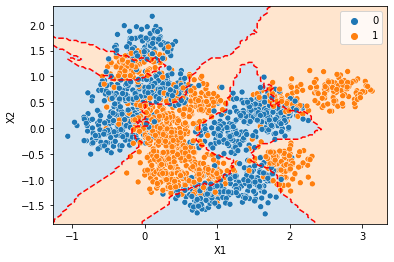

In [12]:
cls = KNeighborsClassifier(n_neighbors=Kopt) 
cls.fit(X, y) 
plot_clustering(X, y) 
add_decision_boundary(cls) 
plt.show()

In [13]:
from tp07.src.knn_cross_validation import knn_cross_validation
n_folds = 10 
gen = knn_cross_validation(X, y, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax() 
Kopt

28

[None]

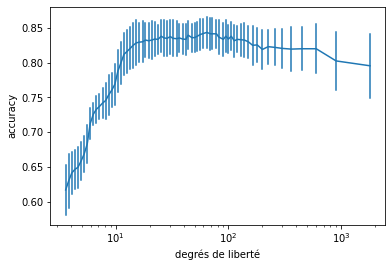

In [14]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy",err_style="bars", ci="sd", data=df) 
sp.set(xscale="log")

In [16]:
from tp07.src.knn_cross_validation import knn_cross_validation2
n_folds = 10 
gen = knn_cross_validation2(X, y, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"]) 
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax() 
Kopt

32

[None]

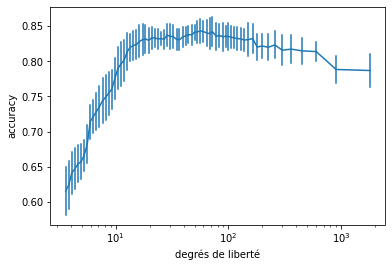

In [17]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy",err_style="bars", ci="sd", data=df) 
sp.set(xscale="log")

In [19]:
from sklearn.model_selection import GridSearchCV

n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int)) 
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier() 
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10) 
search.fit(X, y) 
search.best_params_

{'n_neighbors': 32}

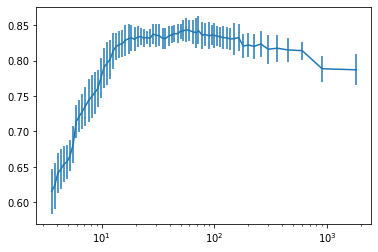

In [20]:
df = pd.DataFrame(
    (dict(n_neighbors=d["n_neighbors"], error=e, std=s) 
    for d, e, s in zip( 
        search.cv_results_["params"], 
        search.cv_results_["mean_test_score"], 
        search.cv_results_["std_test_score"], 
        ) 
    )
) 
n = 9/10 * len(y) 
plt.errorbar(n/df["n_neighbors"], df["error"], yerr=df["std"]) 
plt.xscale("log") 
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66) 
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int)) 
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier() 
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10) 
search.fit(X_train, y_train) 
y_pred = search.predict(X_test) 
accuracy_score(y_pred, y_test)

0.8485294117647059